In [1]:
import pandas as pd


data = pd.read_csv("data_clean.csv", parse_dates=["Date"], index_col=0)

# Data with outliers

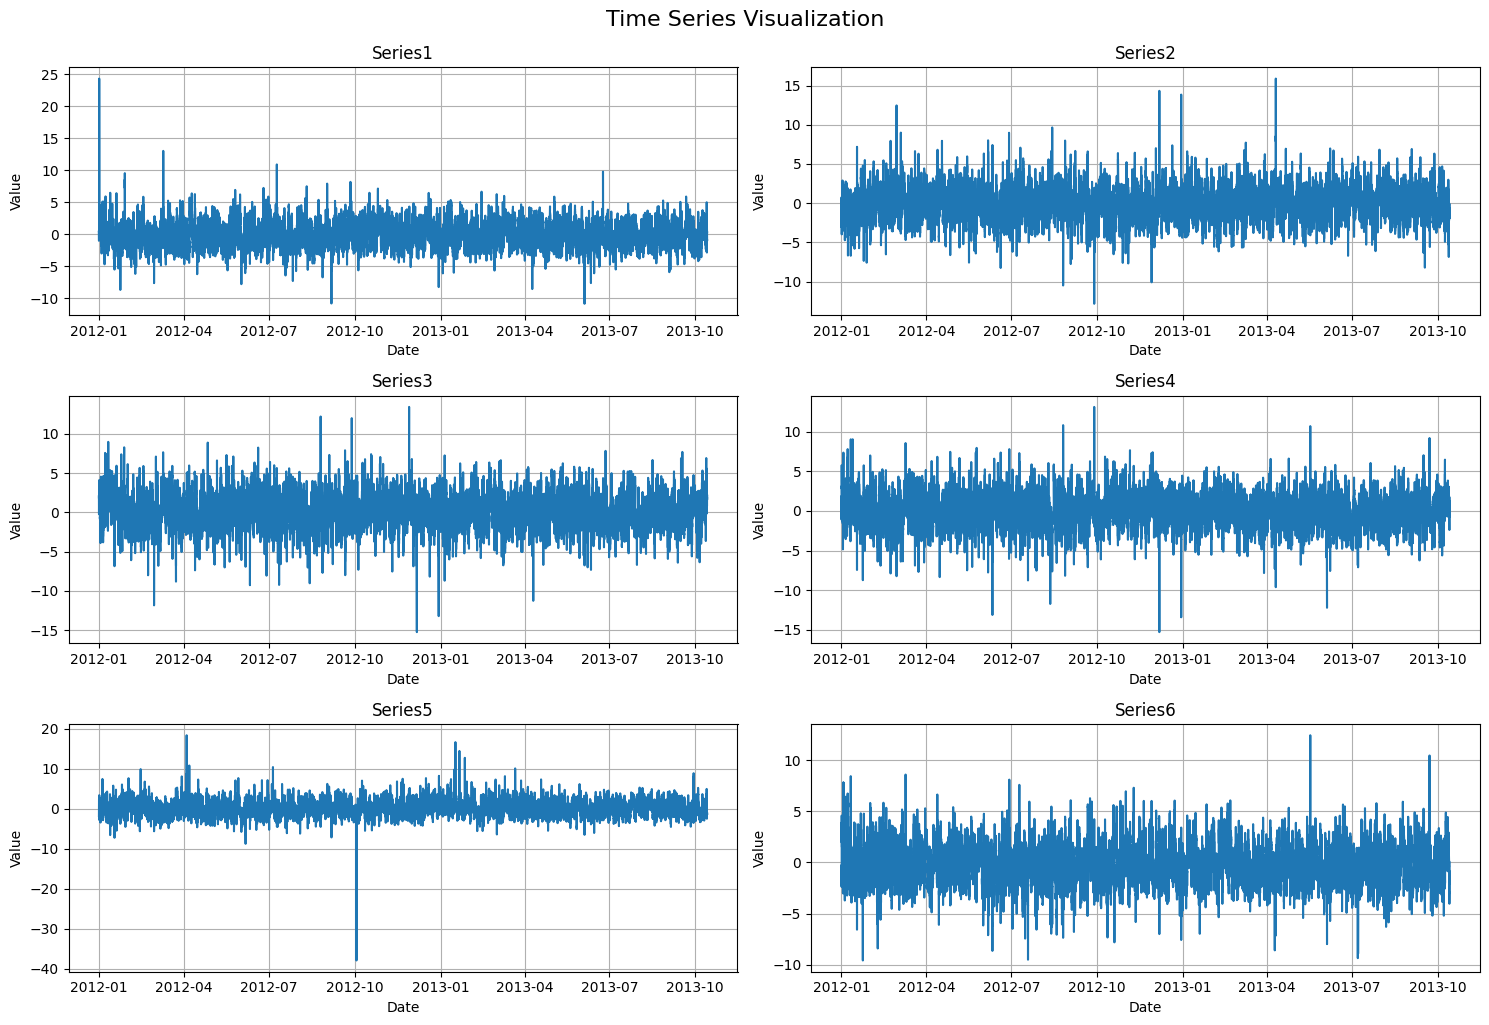

In [2]:
import matplotlib.pyplot as plt

df = data


plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(df.index, df[column], label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()

plt.suptitle('Time Series Visualization', fontsize=16, y=1.02)
plt.show()

# Data without outliers (z-score 3)

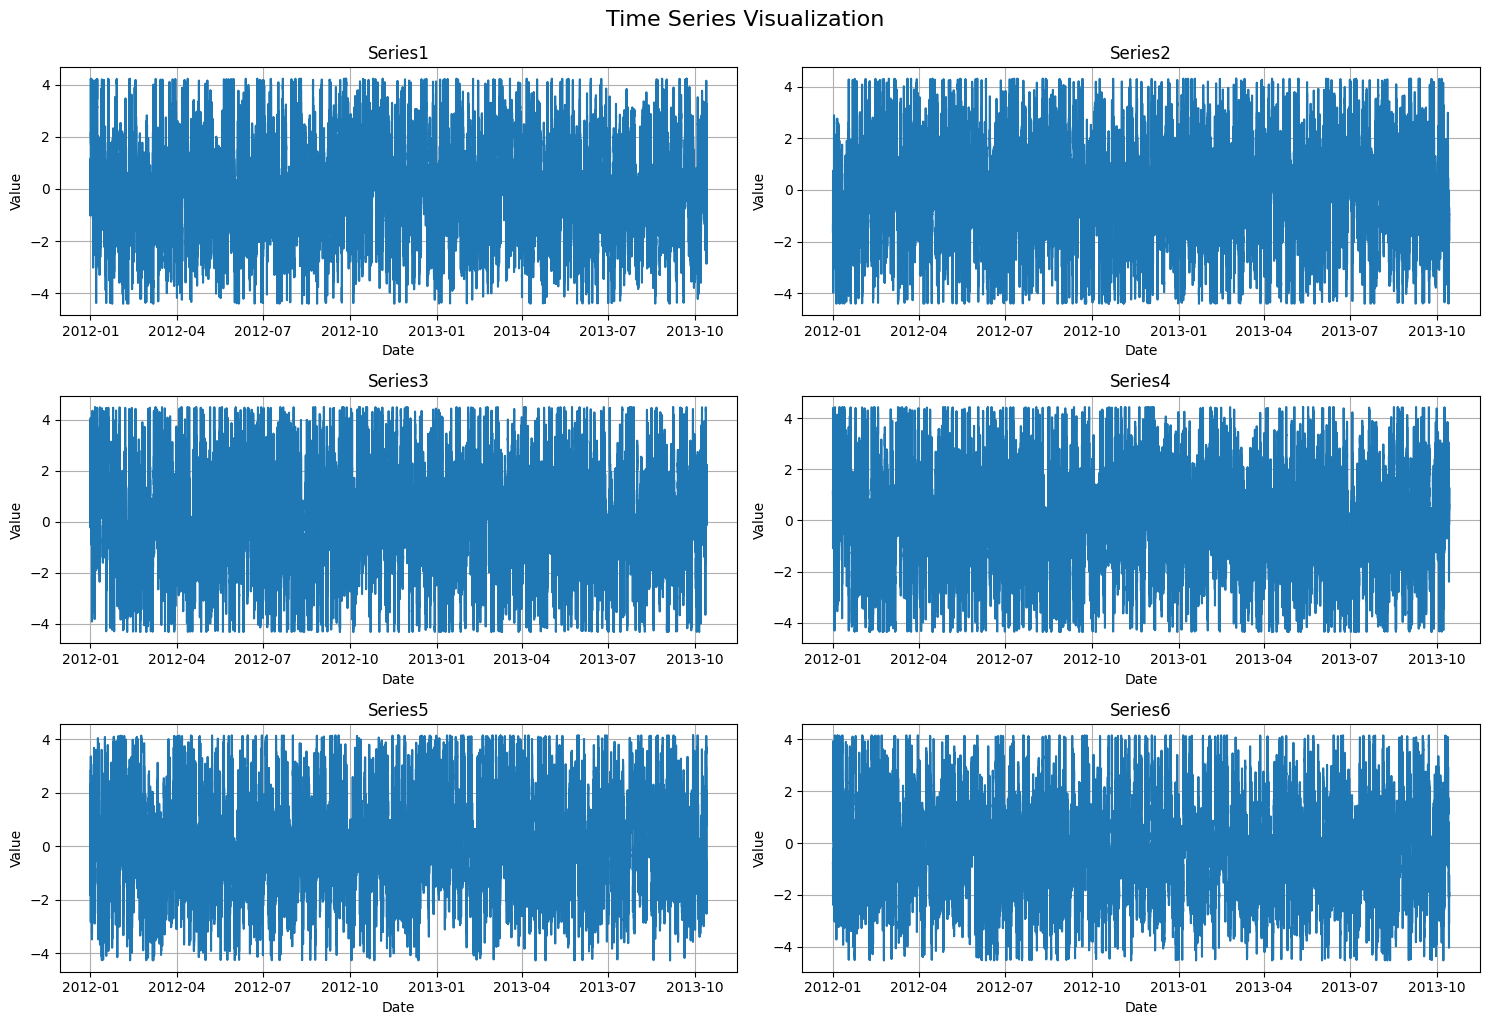

In [2]:
import matplotlib.pyplot as plt

df = data


plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(df.index, df[column], label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()

plt.suptitle('Time Series Visualization', fontsize=16, y=1.02)
plt.show()

# Testing stationarity

In [1]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

df_no_outliers = pd.read_csv("data_clean.csv", parse_dates=["Date"], index_col=0)

start_date = "2013-01-01 00:00:00"

df = df_no_outliers[start_date:]

# Function to perform ADF test
def adf_test(series, title=''):
    print(f'ADF Test for {title}')
    result = adfuller(series.dropna(), maxlag=10)
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)

    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value

    print(out)
    if result[1] <= 0.05:
        print("=> Stationary (reject H0)")
    else:
        print("=> Non-stationary (fail to reject H0)")
    print('\n')

# Apply to each series
for column in df_no_outliers.columns:
    adf_test(df_no_outliers[column], title=column)

ADF Test for Series1
ADF Statistic                     -31.113231
p-value                             0.000000
# Lags Used                         9.000000
Number of Observations Used    938362.000000
Critical Value (1%)                -3.430357
Critical Value (5%)                -2.861543
Critical Value (10%)               -2.566772
dtype: float64
=> Stationary (reject H0)


ADF Test for Series2
ADF Statistic                     -36.997619
p-value                             0.000000
# Lags Used                        10.000000
Number of Observations Used    938361.000000
Critical Value (1%)                -3.430357
Critical Value (5%)                -2.861543
Critical Value (10%)               -2.566772
dtype: float64
=> Stationary (reject H0)


ADF Test for Series3
ADF Statistic                     -34.870048
p-value                             0.000000
# Lags Used                        10.000000
Number of Observations Used    938361.000000
Critical Value (1%)                -3.430